#### Bài 1: Tính khoảng cách
#### 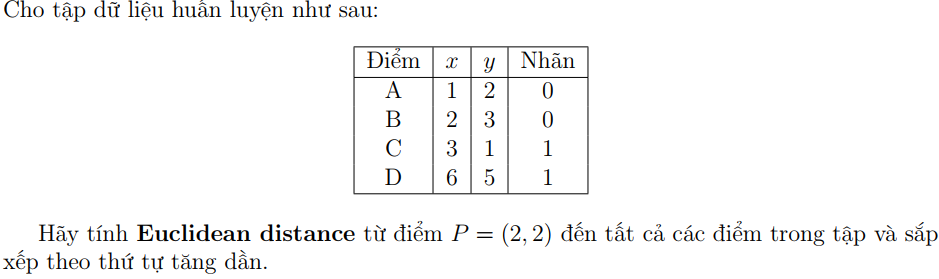

In [13]:
points = {
    'A': (1,2,0),
    'B': (2,3,0),
    'C': (3,1,1),
    'D': (6,5,1)
}

P= (2,2)

import numpy as np

distances={}
for point, coords in points.items():
    dist = np.sqrt((P[0] - coords[0])**2 + (P[1] - coords[1])**2)
    distances[point] = dist
    print(f"Khoảng cách từ P đến điểm {point} là: {dist:.4f}")

#print(distances)

sorted_distances = dict(sorted(distances.items(), key=lambda x:x[1]))
print("\n Sắp xếp theo thứ tự tăng dần")

for point, dist in sorted_distances.items():
    print(f"{point}: {dist:.4f}")



Khoảng cách từ P đến điểm A là: 1.0000
Khoảng cách từ P đến điểm B là: 1.0000
Khoảng cách từ P đến điểm C là: 1.4142
Khoảng cách từ P đến điểm D là: 5.0000

 Sắp xếp theo thứ tự tăng dần
A: 1.0000
B: 1.0000
C: 1.4142
D: 5.0000


#### Bài 2: Phân loại với KNN
#### Sử dụng dữ liệu từ Bài 1, hãy phân loại điểm P = (2, 2) với:
####  • K = 1
####  • K = 3
####  Gợi ý:
####  • Tìm K điểm gần nhất theo khoảng cách Euclid.
####  • Đếm nhãn của các điểm gần nhất.
####  • Chọn nhãn phổ biến nhất.

In [16]:
def knn_classify(k):
    k_nearest = list(sorted_distances.items())[:k]
    print(f"\n Với K = {k}:")
    print("Các điểm gần nhất:", [point for point, _ in k_nearest])

    labels = [points [point][2] for point, _ in k_nearest]
    label_counts = {0: labels.count(0), 1: labels.count(1)}
    print("Số lượng nhãn:", label_counts)

    predicted_label = max(label_counts, key = label_counts.get)
    print(f"Nhãn dự đoán: {predicted_label}")

    #return predicted_label

knn_classify(3)

knn_classify(1)


 Với K = 3:
Các điểm gần nhất: ['A', 'B', 'C']
Số lượng nhãn: {0: 2, 1: 1}
Nhãn dự đoán: 0

 Với K = 1:
Các điểm gần nhất: ['A']
Số lượng nhãn: {0: 1, 1: 0}
Nhãn dự đoán: 0


#### Bài 3: KNN trong không gian 3 chiều.
#### Cho:
#### x = (2, 1, 4), y = (5, 3, 0)
#### Tính khoảng cách Euclid giữa x và y.
#### d(x, y) =?

In [12]:
import numpy as np
x = (2,1,4)
y = (5,3,0)

distance = np.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2 + (x[2] - y[2])**2)
print(f"Khoảng cách Euclid giữa x và y: {distance:.4f}")


Khoảng cách Euclid giữa x và y: 5.3852


#### Bài 4: Ảnh hưởng của K đến kết quả
#### Giả sử bạn có tập dữ liệu gồm 9 điểm, trong đó:
#### • 5 điểm có nhãn A
#### • 4 điểm có nhãn B
#### Nếu chọn:
#### • K = 3
#### • K = 5
#### • K = 9
#### Trong trường hợp điểm cần phân loại có các hàng xóm gần nhất được chọn từ nhóm 9 điểm trên, hãy cho biết nhãn sẽ được gán theo từng giá trị K.

In [21]:
sample_points={
    'P1': (1,1,'A'),
    'P2': (2,1,'A'),
    'P3': (1,2,'A'),
    'P4': (3, 1, 'A'),
    'P5': (2, 3, 'A'),
    'P6': (4, 2, 'B'),
    'P7': (5, 3, 'B'),
    'P8': (4, 4, 'B'),
    'P9': (6, 2, 'B')
}

test_point = (3,3)

import numpy as np
test_distances = {}
for point, coords in sample_points.items():
    dist = np.sqrt((test_point[0] - coords[0])**2 + (test_point[1] - coords[1])**2)
    test_distances[point] = dist

sorted_test_distances = dict(sorted(test_distances.items(), key=lambda x: x[1]))

def classify_with_k(k):
    k_nearest = list(sorted_test_distances.items()) [:k]
    labels = [sample_points[point][2] for point, _ in k_nearest]
    label_counts = {'A': labels.count('A'), 'B': labels.count('B')}
    predicted = max(label_counts, key =label_counts.get)
    return predicted, label_counts

# Tính khoảng cách
# Sắp xếp
# Phân loại theo k: Lẩy k điểm, tách nhãn, đếm nhãn theo từng loại, chọn nhãn phổ biến nhất

#Test
k_values = [3,5,9]
for k in k_values:
    predicted, counts = classify_with_k(k)
    print(f"\nVới k = {k}")
    print(f"Số lượng nhãn: {counts}")
    print(f"Nhãn dự đoán là: {predicted}")




Với k = 3
Số lượng nhãn: {'A': 1, 'B': 2}
Nhãn dự đoán là: B

Với k = 5
Số lượng nhãn: {'A': 2, 'B': 3}
Nhãn dự đoán là: B

Với k = 9
Số lượng nhãn: {'A': 5, 'B': 4}
Nhãn dự đoán là: A
